In [1]:
import numpy as np
import matplotlib.pylab as plt

In [154]:
center_1 = [1,2]
center_2 = [2,3]
class_1 = np.random.randn(100,2)/4+center_1
class_2 = np.random.randn(100,2)/4+center_2

In [155]:
X_train = np.vstack([class_1,class_2])
y_train = np.array([(i>99)*2.0-1.0 for i in range(len(X_train))])

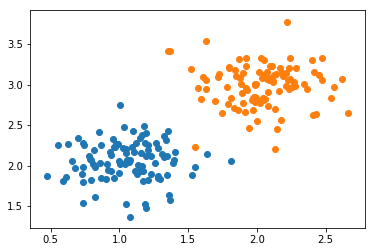

In [156]:
plt.scatter(class_1[:,0],class_1[:,1])
plt.scatter(class_2[:,0],class_2[:,1])

$$
\theta \leftarrow \theta - \varepsilon\left( \sum_{i=1}^n \partial \max(0,1-f_{\theta}(x_i)y_i) + \lambda R\theta\right)
$$

In [157]:
def update(x,y,theta_now,eps,lmd):
    temp = 0
    for i in range(len(x)):
        temp += get_partial(theta_now,x[i],y[i])
    R = np.eye(len(theta_now))
    theta_next = theta_now - eps*(temp + lmd*R@theta_now)
    return theta_next

In [158]:
def get_K(x,sigma=1):
    n = len(x)
    K = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            K[i,j] = np.exp(-np.sum((x[i]-x[j])**2)/(2*sigma**2))
    return K

In [159]:
def get_partial(theta,x,y):
    if theta.T@x*y<1:
        return -y*x
    else:
        return np.zeros(len(x))

In [160]:
def func(x,w,b):
    y = (-w[0]*x-b)/w[1]
    return y

In [161]:
def main(x,y,eps=0.001,lmd=0.01,threshold=0.01):
    n,m = x.shape
    
    w = np.random.randn(m)
    b = np.random.randn(1)
    theta = np.hstack([w,b])
    
    ones = np.ones([n,1])
    x = np.hstack([x,ones])
    
    count = 0
    while(True):
        count += 1
        theta_next = update(x,y,theta,eps,lmd)
        if np.linalg.norm(theta_next-theta)<threshold:
            break
        theta = theta_next
    
    return theta[:m],theta[-1]

In [162]:
w,b = main(X_train,y_train)

In [163]:
x = np.arange(1,2.,0.1)
y = func(x,w,b)

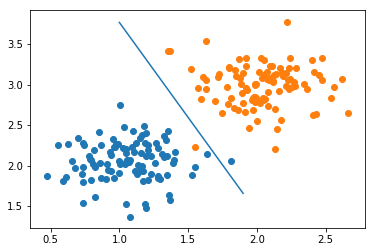

In [164]:
plt.scatter(class_1[:,0],class_1[:,1])
plt.scatter(class_2[:,0],class_2[:,1])
plt.plot(x,y)